<a href="https://colab.research.google.com/github/mmaithani/Kaggle-Projects/blob/master/hubmap_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U pip
!pip install -q -U seaborn

<a id="1"></a>
<h2 style='background:#EAA6D2; border:0; color:white'><center>hubmap- Data Analysis<center><h2>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import tifffile

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

# Make directory named kaggle and copy kaggle.json file there.
! chmod 600 ~/.kaggle/kaggle.json

# Change the permissions of the file.
! kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51            455  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57            162  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44            824  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Turnout rates           4KB  2020-11-26 00:21:15            302  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collisio

In [10]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


In [6]:
!kaggle competitions download -c hubmap-kidney-segmentation

  0% 0.00/106k [00:00<?, ?B/s]
100% 106k/106k [00:00<00:00, 39.8MB/s]
 99% 1.37G/1.39G [00:12<00:00, 124MB/s]
100% 1.39G/1.39G [00:12<00:00, 123MB/s]
  0% 0.00/3.23k [00:00<?, ?B/s]
100% 3.23k/3.23k [00:00<00:00, 3.03MB/s]
 97% 386M/396M [00:03<00:00, 122MB/s]
100% 396M/396M [00:03<00:00, 121MB/s]
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 72.1MB/s]
 99% 772M/777M [00:06<00:00, 77.5MB/s]
100% 777M/777M [00:07<00:00, 116MB/s] 
100% 1.02G/1.02G [00:19<00:00, 29.4MB/s]
100% 1.02G/1.02G [00:19<00:00, 55.3MB/s]
  0% 0.00/4.62k [00:00<?, ?B/s]
100% 4.62k/4.62k [00:00<00:00, 4.57MB/s]
100% 1.91G/1.91G [00:36<00:00, 12.3MB/s]
100% 1.91G/1.91G [00:36<00:00, 56.1MB/s]
  0% 0.00/408k [00:00<?, ?B/s]
100% 408k/408k [00:00<00:00, 111MB/s]
  0% 0.00/944 [00:00<?, ?B/s]
100% 944/944 [00:00<00:00, 764kB/s]
  0% 0.00/280k [00:00<?, ?B/s]
100% 280k/280k [00:00<00:00, 92.9MB/s]
  0% 0.00/76.4k [00:00<?, ?B/s]
100% 76.4k/76.4k [00:00<00:00, 65.9MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 20

## arrraange files in train test directory order

In [12]:
! mkdir test
! mkdir train

moving files to test directory 

In [26]:
test_folder= ['26dc41664-anatomical-structure.json',
              '26dc41664.tiff.zip',
              'afa5e8098-anatomical-structure.json',
              'afa5e8098.tiff.zip',
              'b2dc8411c-anatomical-structure.json',
              'b2dc8411c.tiff.zip',
              'b9a3865fc-anatomical-structure.json',
              'c68fe75ea-anatomical-structure.json',
              'c68fe75ea.tiff.zip']
for file in test_folder:
  print("!cp",file, '/content/test')
  print("!rm",file)

!rm 26dc41664-anatomical-structure.json
!rm 26dc41664.tiff.zip
!rm afa5e8098-anatomical-structure.json
!rm afa5e8098.tiff.zip
!rm b2dc8411c-anatomical-structure.json
!rm b2dc8411c.tiff.zip
!rm b9a3865fc-anatomical-structure.json
!rm c68fe75ea-anatomical-structure.json
!rm c68fe75ea.tiff.zip


In [23]:
!cp 26dc41664-anatomical-structure.json /content/test
!cp 26dc41664.tiff.zip /content/test
!cp afa5e8098-anatomical-structure.json /content/test
!cp afa5e8098.tiff.zip /content/test
!cp b2dc8411c-anatomical-structure.json /content/test
!cp b2dc8411c.tiff.zip /content/test
!cp b9a3865fc-anatomical-structure.json /content/test
!cp c68fe75ea-anatomical-structure.json /content/test
!cp c68fe75ea.tiff.zip /content/test

In [27]:
!rm 26dc41664-anatomical-structure.json
!rm 26dc41664.tiff.zip
!rm afa5e8098-anatomical-structure.json
!rm afa5e8098.tiff.zip
!rm b2dc8411c-anatomical-structure.json
!rm b2dc8411c.tiff.zip
!rm b9a3865fc-anatomical-structure.json
!rm c68fe75ea-anatomical-structure.json
!rm c68fe75ea.tiff.zip

In [56]:
import os
for i in os.listdir('./'):
  print("!mv",i,"/content/train/")
print('-'*20)
for i in os.listdir('./train'):
  if '.zip' in i:
    print("!unzip","/content/train/"+i)

for i in os.listdir('./test'):
  if '.zip' in i:
    print("!unzip","/content/test/"+i)
print("-"*25)
for i in os.listdir('./train'):
  if '.zip' in i:
    print("!rm","/content/train/"+i)

for i in os.listdir('./test'):
  if '.zip' in i:
    print("!rm","/content/test/"+i)

!mv .config /content/train/
!mv 54f2eec69.tiff /content/train/
!mv 26dc41664.tiff /content/train/
!mv drive /content/train/
!mv b9a3865fc.tiff /content/train/
!mv 2f6ecfcdf.tiff /content/train/
!mv c68fe75ea.tiff /content/train/
!mv aaa6a05cc.tiff /content/train/
!mv .ipynb_checkpoints /content/train/
!mv 1e2425f28.tiff /content/train/
!mv b2dc8411c.tiff /content/train/
!mv train.csv /content/train/
!mv 095bf7a1f.tiff /content/train/
!mv sample_submission.csv /content/train/
!mv test /content/train/
!mv train /content/train/
!mv HuBMAP-20-dataset_information.csv /content/train/
!mv afa5e8098.tiff /content/train/
!mv 0486052bb.tiff /content/train/
!mv sample_data /content/train/
--------------------
!unzip /content/train/0486052bb.tiff.zip
!unzip /content/train/aaa6a05cc.tiff.zip
!unzip /content/train/54f2eec69.tiff.zip
!unzip /content/train/095bf7a1f.tiff.zip
!unzip /content/train/1e2425f28.tiff.zip
!unzip /content/train/2f6ecfcdf.tiff.zip
!unzip /content/train/b9a3865fc.tiff.zip
!unzi

In [ ]:
!mv 1e2425f28.json /content/train/
!mv 1e2425f28-anatomical-structure.json /content/train/
!mv aaa6a05cc-anatomical-structure.json /content/train/
!mv 54f2eec69.json /content/train/
!mv 0486052bb.tiff.zip /content/train/
!mv aaa6a05cc.tiff.zip /content/train/
!mv 2f6ecfcdf-anatomical-structure.json /content/train/
!mv 2f6ecfcdf.json /content/train/
!mv 095bf7a1f.json /content/train/
!mv aaa6a05cc.json /content/train/
!mv 0486052bb.json /content/train/
!mv 54f2eec69.tiff.zip /content/train/
!mv cb2d976f4.json /content/train/
!mv 095bf7a1f-anatomical-structure.json /content/train/
!mv 095bf7a1f.tiff.zip /content/train/
!mv 1e2425f28.tiff.zip /content/train/
!mv cb2d976f4-anatomical-structure.json /content/train/
!mv 0486052bb-anatomical-structure.json /content/train/
!mv 54f2eec69-anatomical-structure.json /content/train/
!mv 2f6ecfcdf.tiff.zip /content/train/
!mv b9a3865fc.tiff.zip /content/train/

## unzipping 

In [55]:
# ! unzip train.csv.zip 
!unzip /content/train/0486052bb.tiff.zip /content/train/
!unzip /content/train/aaa6a05cc.tiff.zip
!unzip /content/train/54f2eec69.tiff.zip
!unzip /content/train/095bf7a1f.tiff.zip
!unzip /content/train/1e2425f28.tiff.zip
!unzip /content/train/2f6ecfcdf.tiff.zip
!unzip /content/train/b9a3865fc.tiff.zip
!unzip /content/test/c68fe75ea.tiff.zip
!unzip /content/test/b2dc8411c.tiff.zip
!unzip /content/test/afa5e8098.tiff.zip
!unzip /content/test/26dc41664.tiff.zip

rm: cannot remove 'train.csv.zip': No such file or directory
Archive:  /content/train/0486052bb.tiff.zip
  inflating: 0486052bb.tiff          
Archive:  /content/train/aaa6a05cc.tiff.zip
  inflating: aaa6a05cc.tiff          
Archive:  /content/train/54f2eec69.tiff.zip
  inflating: 54f2eec69.tiff          
Archive:  /content/train/095bf7a1f.tiff.zip
  inflating: 095bf7a1f.tiff          Archive:  /content/train/1e2425f28.tiff.zip
  inflating: 1e2425f28.tiff          
Archive:  /content/train/2f6ecfcdf.tiff.zip
  inflating: 2f6ecfcdf.tiff          Archive:  /content/train/b9a3865fc.tiff.zip
  inflating: b9a3865fc.tiff          Archive:  /content/test/c68fe75ea.tiff.zip
  inflating: c68fe75ea.tiff          
Archive:  /content/test/b2dc8411c.tiff.zip
  inflating: b2dc8411c.tiff          
Archive:  /content/test/afa5e8098.tiff.zip
  inflating: afa5e8098.tiff          
Archive:  /content/test/26dc41664.tiff.zip
  inflating: 26dc41664.tiff          


In [ ]:
!rm train.csv.zip


In [45]:
import pandas as pd
train_csv=pd.read_csv('train.csv')
train_csv.info()
train_csv.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8 non-null      object
 1   encoding  8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


id                                           encoding
0  2f6ecfcdf  296084587 4 296115835 6 296115859 14 296147109...
1  aaa6a05cc  30989109 59 31007591 64 31026074 68 31044556 7...
2  cb2d976f4  78144363 5 78179297 15 78214231 25 78249165 35...
3  0486052bb  101676003 6 101701785 8 101727568 9 101753351 ...
4  e79de561c  7464094 14 7480273 41 7496453 67 7512632 82 75...
5  095bf7a1f  113430380 22 113468538 67 113506697 111 113544...
6  54f2eec69  124601765 36 124632133 109 124662536 147 12469...
7  1e2425f28  49453112 7 49479881 22 49506657 31 49533433 40...

In [ ]:
BASE_PATH = "./"
TRAIN_PATH = os.path.join(BASE_PATH, "train")
print(os.listdir(BASE_PATH))

['sample_submission.csv', 'HuBMAP-20-dataset_information.csv', 'test', 'train', 'train.csv']


### Train masks

**train.csv** contains the unique IDs for each image, as well as an RLE-encoded representation of the mask for the objects in the image. See the evaluation tab for details of the RLE encoding scheme.

In [ ]:
df_train = pd.read_csv(
    os.path.join(BASE_PATH, "train.csv")
)
df_train

id                                           encoding
0  2f6ecfcdf  296084587 4 296115835 6 296115859 14 296147109...
1  aaa6a05cc  30989109 59 31007591 64 31026074 68 31044556 7...
2  cb2d976f4  78144363 5 78179297 15 78214231 25 78249165 35...
3  0486052bb  101676003 6 101701785 8 101727568 9 101753351 ...
4  e79de561c  7464094 14 7480273 41 7496453 67 7512632 82 75...
5  095bf7a1f  113430380 22 113468538 67 113506697 111 113544...
6  54f2eec69  124601765 36 124632133 109 124662536 147 12469...
7  1e2425f28  49453112 7 49479881 22 49506657 31 49533433 40...

### Submission df

In [ ]:
df_sub = pd.read_csv(
    os.path.join(BASE_PATH, "sample_submission.csv"))
df_sub

id  predicted
0  b9a3865fc        NaN
1  b2dc8411c        NaN
2  26dc41664        NaN
3  c68fe75ea        NaN
4  afa5e8098        NaN

### Number of samples

In [ ]:
print(f"Number of train images: {df_train.shape[0]}")
print(f"Number of test images: {df_sub.shape[0]}")

Number of train images: 8
Number of test images: 5


### Train and test metadata

**HuBMAP-20-dataset_information.csv** contains additional information (including anonymized patient data) about each image.

In [ ]:
df_info = pd.read_csv(
    os.path.join(BASE_PATH, "HuBMAP-20-dataset_information.csv")
)
df_info.sample(3)

image_file  width_pixels  height_pixels  \
5  095bf7a1f.tiff         39000          38160   
8  b9a3865fc.tiff         40429          31295   
3  e79de561c.tiff         27020          16180   

  anatomical_structures_segmention_file glomerulus_segmentation_file  \
5   095bf7a1f-anatomical-structure.json               095bf7a1f.json   
8   b9a3865fc-anatomical-structure.json               b9a3865fc.json   
3   e79de561c-anatomical-structure.json               e79de561c.json   

   patient_number                       race               ethnicity     sex  \
5           68250                      White  Not Hispanic or Latino  Female   
8           67347                      White  Not Hispanic or Latino  Female   
3           67026  Black or African American  Not Hispanic or Latino    Male   

   age  weight_kilograms  height_centimeters  bmi_kg/m^2 laterality  \
5   44              71.7               160.0        28.0      Right   
8   58              59.0               160.0        23.0      Right   
3   53              73.0               166.0        26.5       Left   

   percent_cortex  percent_medulla  
5              65               35  
8              55               45  
3              55               45

## Utility functions

In [ ]:
# https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle2mask(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [
        np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])
    ]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = 1
    return img.reshape(shape).T


def read_image(image_id, scale=None, verbose=1):
    image = tifffile.imread(
        os.path.join(BASE_PATH, f"train/{image_id}.tiff")
    )
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    
    mask = rle2mask(
        df_train[df_train["id"] == image_id]["encoding"].values[0], 
        (image.shape[1], image.shape[0])
    )
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
        print(f"[{image_id}] Mask shape: {mask.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        mask = cv2.resize(mask, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
            print(f"[{image_id}] Resized Mask shape: {mask.shape}")
        
    return image, mask


def read_test_image(image_id, scale=None, verbose=1):
    image = tifffile.imread(
        os.path.join(BASE_PATH, f"test/{image_id}.tiff")
    )
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image


def plot_image_and_mask(image, mask, image_id):
    plt.figure(figsize=(16, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title(f"Image {image_id}", fontsize=18)
    
    plt.subplot(1, 3, 2)
    plt.imshow(image)
    plt.imshow(mask, cmap="hot", alpha=0.5)
    plt.title(f"Image {image_id} + mask", fontsize=18)    
    
    plt.subplot(1, 3, 3)
    plt.imshow(mask, cmap="hot")
    plt.title(f"Mask", fontsize=18)    
    
    plt.show()
    
    
def plot_grid_image_with_mask(image, mask):
    plt.figure(figsize=(16, 16))
    n_cols = 4
    n_rows = 4
    col_start = 0
    col_w = 2500
    row_start = 0
    row_w = 2500
    for i in range(n_cols):
        for j in range(n_rows):
            plt.subplot(n_cols, n_rows, n_rows * i + j + 1)
            sub_image = image[
                col_start + i * col_w : col_start + (i + 1) * col_w, 
                row_start + j * row_w : row_start + (j + 1) * row_w, 
                :
            ]
            sub_mask = mask[
                col_start + i * col_w : col_start + (i + 1) * col_w, 
                row_start + j * row_w : row_start + (j + 1) * row_w, 
            ]
            plt.imshow(sub_image)
            plt.imshow(sub_mask, cmap="hot", alpha=0.5)
            plt.axis("off")
    plt.show()
    

def plot_slice_image_and_mask(image, mask, start_h, end_h, start_w, end_w):
    plt.figure(figsize=(16, 5))
    
    sub_image = image[start_h:end_h, start_w:end_w, :]
    sub_mask = mask[start_h:end_h, start_w:end_w]
    
    plt.subplot(1, 3, 1)
    plt.imshow(sub_image)
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(sub_image)
    plt.imshow(sub_mask, cmap="hot", alpha=0.5)
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(sub_mask, cmap="hot")
    plt.axis("off")
    
    plt.show()

<a id="2"></a>
<h2 style='background:#EAA6D1; border:0; color:white'><center>Image and Masks Visualizations<center><h2>

In [ ]:
small_ids = [
    "0486052bb", "095bf7a1f", "1e2425f28", "2f6ecfcdf",
    "54f2eec69", "aaa6a05cc", "cb2d976f4", "e79de561c",
]
small_images = []
small_masks = []

for small_id in small_ids:
    tmp_image, tmp_mask = read_image(small_id, scale=20, verbose=0)
    small_images.append(tmp_image)
    small_masks.append(tmp_mask)

## Train images

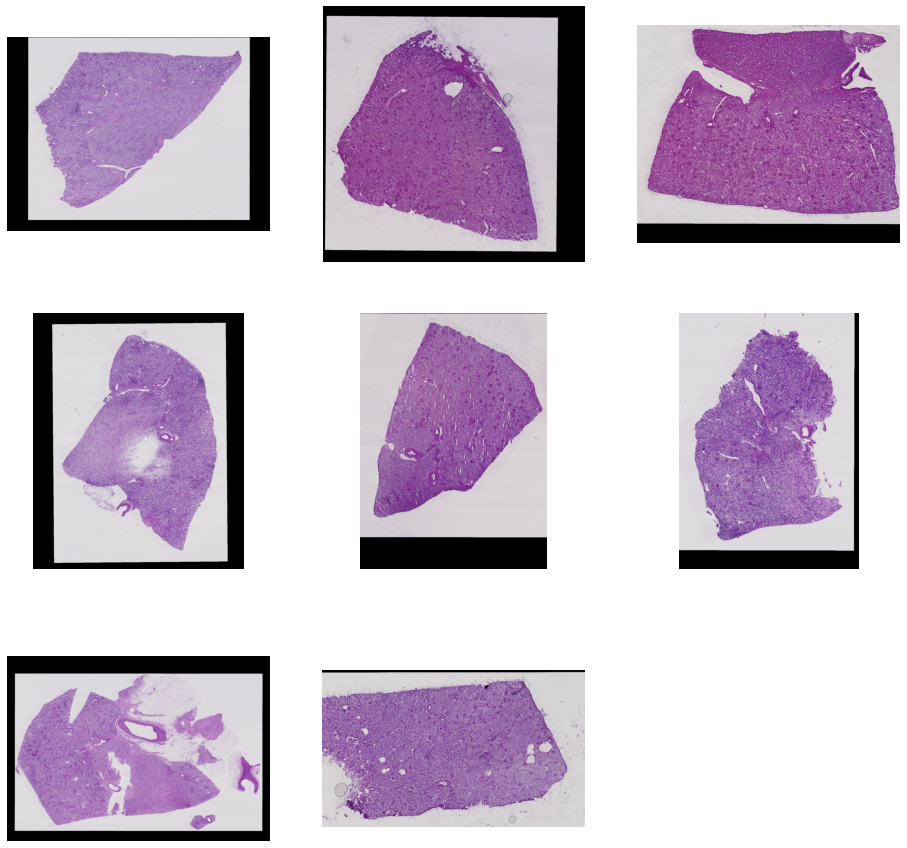

In [ ]:
plt.figure(figsize=(16, 16))
for ind, (tmp_id, tmp_image) in enumerate(zip(small_ids, small_images)):
    plt.subplot(3, 3, ind + 1)
    plt.imshow(tmp_image)
    plt.axis("off")

## Train images + masks

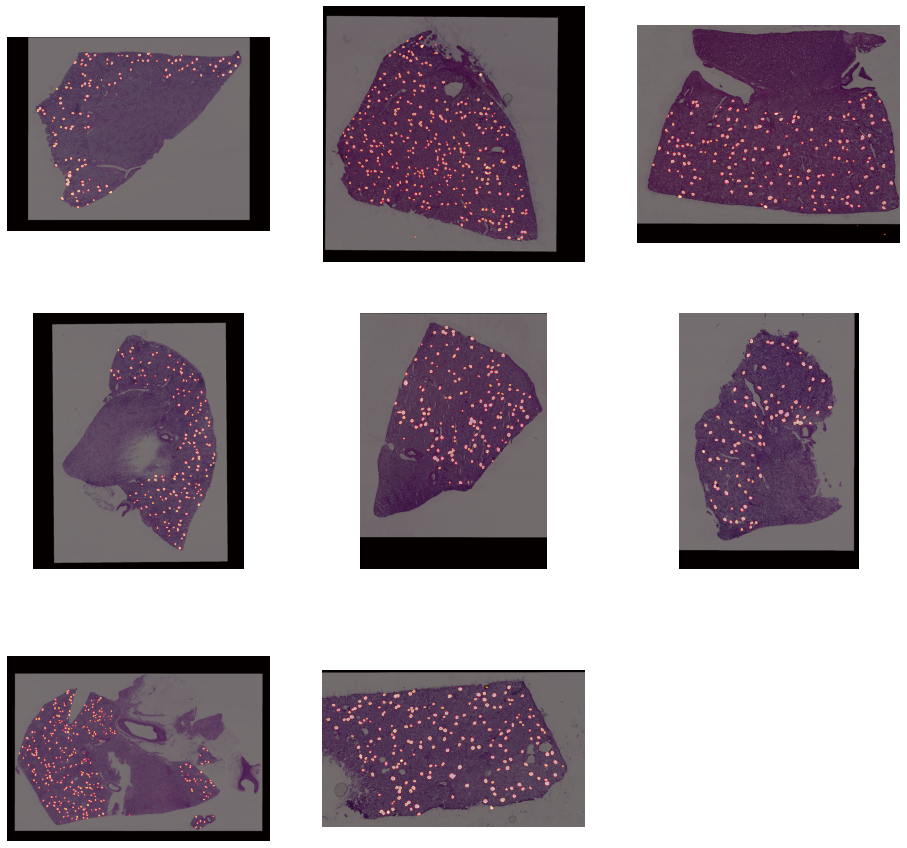

In [ ]:
plt.figure(figsize=(16, 16))
for ind, (tmp_id, tmp_image, tmp_mask) in enumerate(zip(small_ids, small_images, small_masks)):
    plt.subplot(3, 3, ind + 1)
    plt.imshow(tmp_image)
    plt.imshow(tmp_mask, cmap="hot", alpha=0.5)
    plt.axis("off")

In [ ]:
small_ids = [
    "26dc41664", "afa5e8098", "b2dc8411c", "b9a3865fc", "c68fe75ea",
]
small_images = []

for small_id in small_ids:
    tmp_image = read_test_image(small_id, scale=20, verbose=0)
    small_images.append(tmp_image)

## Test images

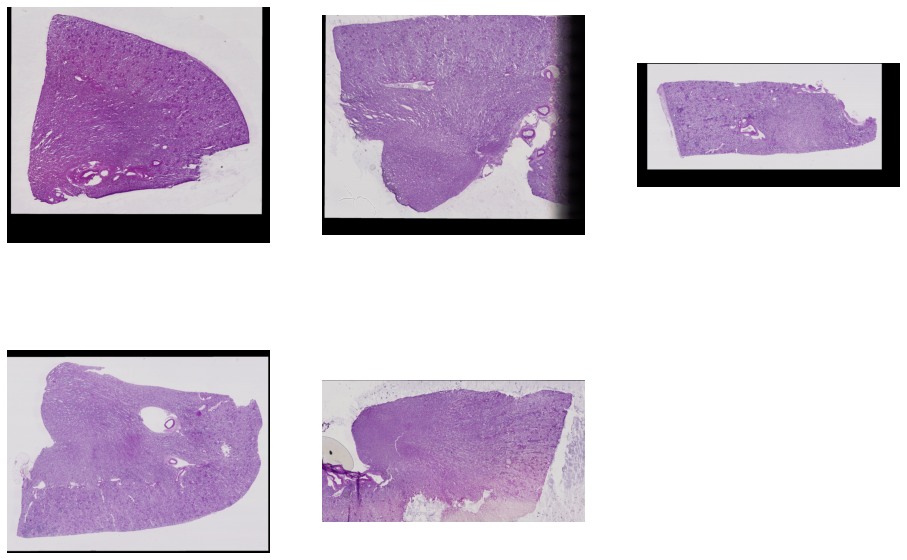

In [ ]:
plt.figure(figsize=(16, 11))
for ind, (tmp_id, tmp_image) in enumerate(zip(small_ids, small_images)):
    plt.subplot(2, 3, ind + 1)
    plt.imshow(tmp_image)
    plt.axis("off")

## 0486052bb

In [ ]:
image_id = "0486052bb"
image, mask = read_image(image_id, 2)

[0486052bb] Image shape: (25784, 34937, 3)
[0486052bb] Mask shape: (25784, 34937)
[0486052bb] Resized Image shape: (12892, 17468, 3)
[0486052bb] Resized Mask shape: (12892, 17468)


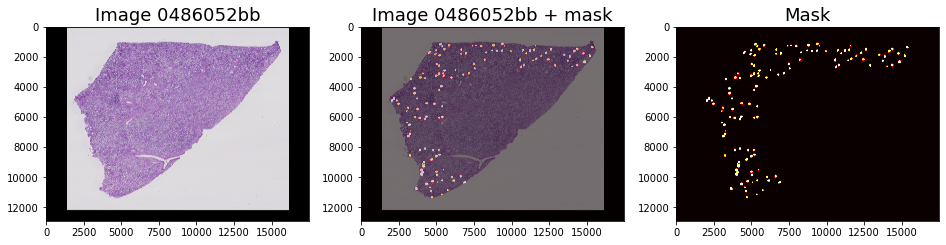

In [ ]:
plot_image_and_mask(image, mask, image_id)

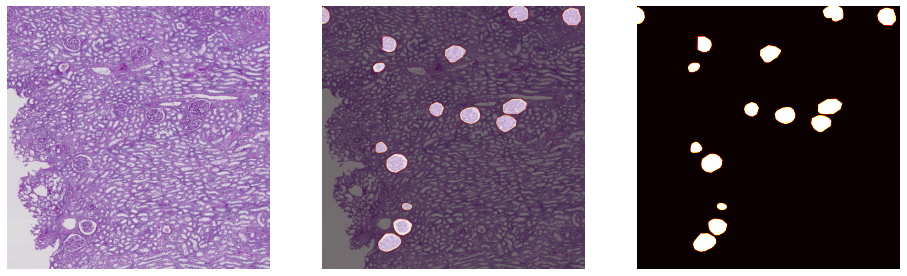

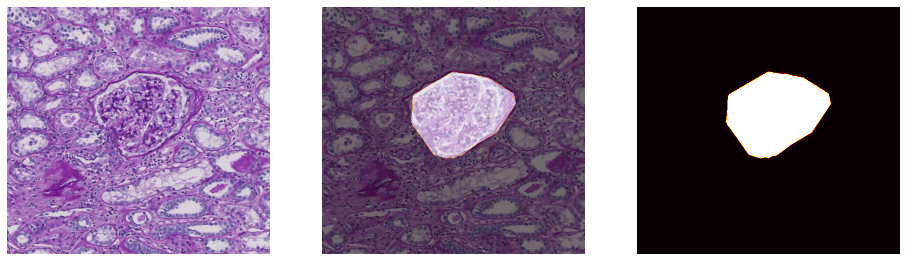

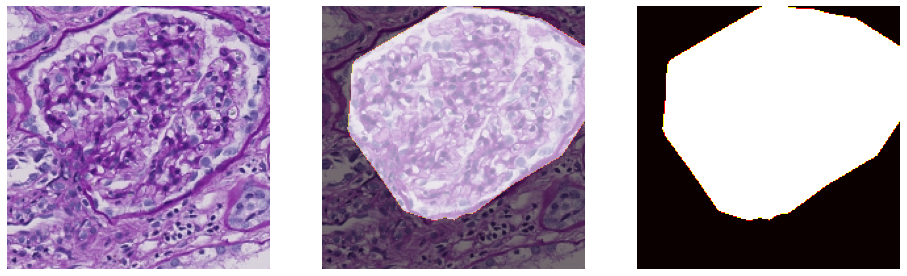

In [ ]:
plot_slice_image_and_mask(image, mask, 5000, 7500, 2500, 5000)
plot_slice_image_and_mask(image, mask, 5250, 5720, 3500, 4000)
plot_slice_image_and_mask(image, mask, 5375, 5575, 3650, 3850)

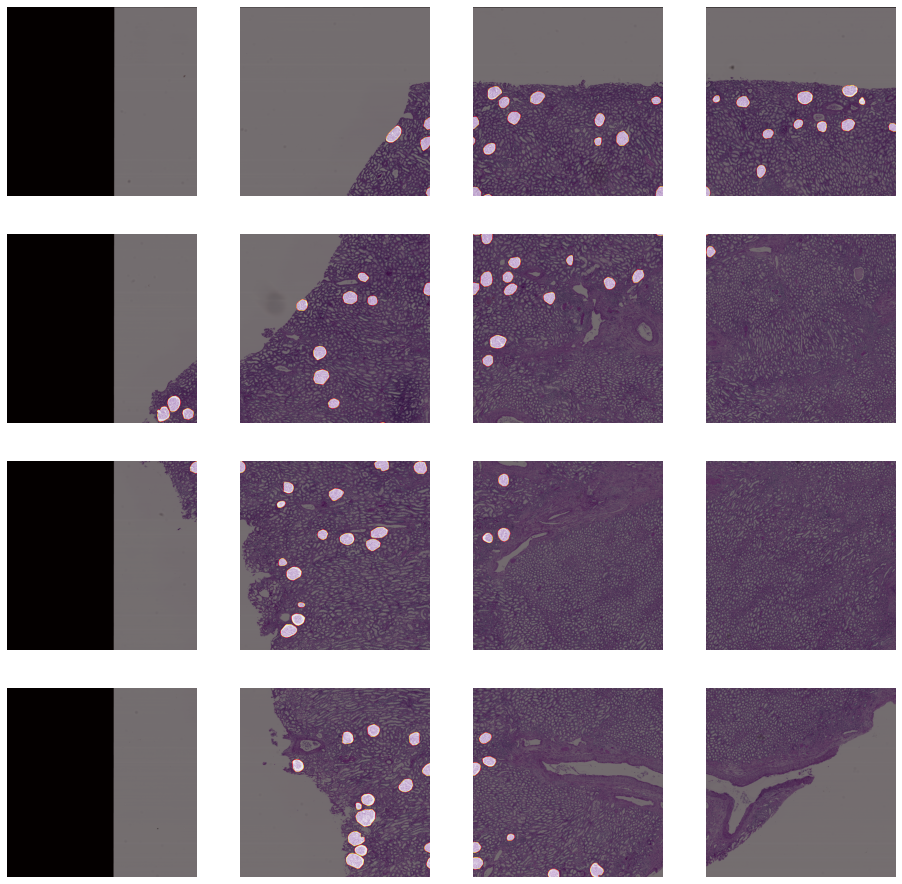

In [ ]:
plot_grid_image_with_mask(image, mask)

## 095bf7a1f

In [ ]:
image_id = "095bf7a1f"
image, mask = read_image(image_id, scale=2)

[095bf7a1f] Image shape: (38160, 39000, 3)
[095bf7a1f] Mask shape: (38160, 39000)
[095bf7a1f] Resized Image shape: (19080, 19500, 3)
[095bf7a1f] Resized Mask shape: (19080, 19500)


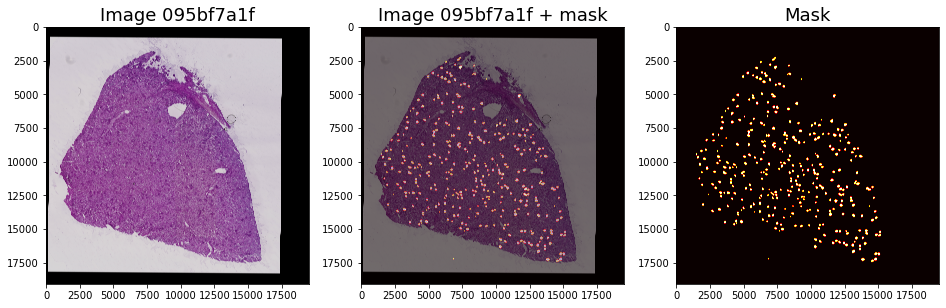

In [ ]:
plot_image_and_mask(image, mask, image_id)

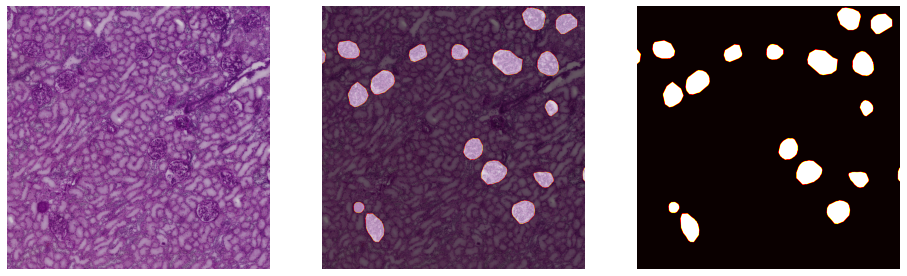

In [ ]:
plot_slice_image_and_mask(image, mask, 7500, 10000, 10000, 12500)

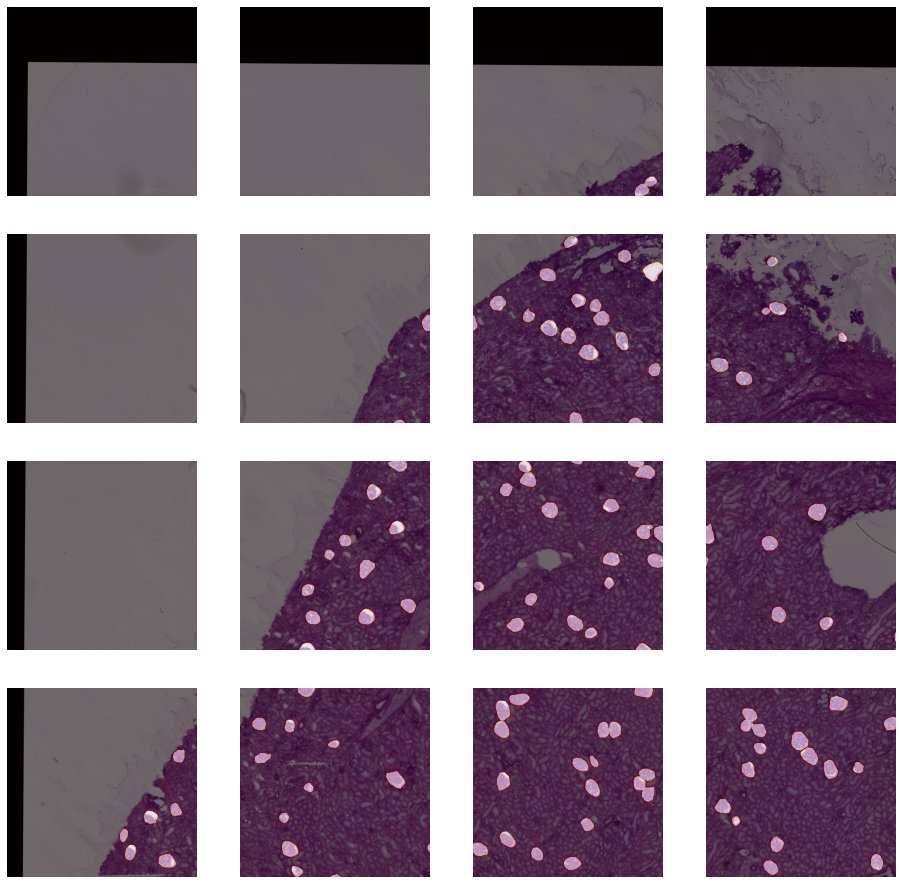

In [ ]:
plot_grid_image_with_mask(image, mask)

## 1e2425f28

In [ ]:
image_id = "1e2425f28"
image, mask = read_image(image_id, scale=2)

[1e2425f28] Image shape: (26780, 32220, 3)
[1e2425f28] Mask shape: (26780, 32220)
[1e2425f28] Resized Image shape: (13390, 16110, 3)
[1e2425f28] Resized Mask shape: (13390, 16110)


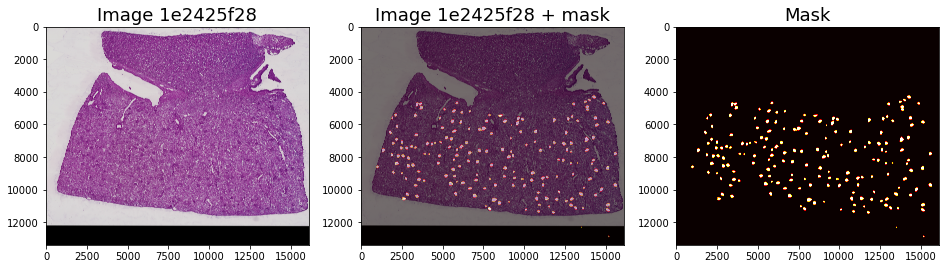

In [ ]:
plot_image_and_mask(image, mask, image_id)

## 2f6ecfcdf

In [ ]:
image_id = "2f6ecfcdf"
image, mask = read_image(image_id, scale=2)

[2f6ecfcdf] Image shape: (31278, 25794, 3)
[2f6ecfcdf] Mask shape: (31278, 25794)
[2f6ecfcdf] Resized Image shape: (15639, 12897, 3)
[2f6ecfcdf] Resized Mask shape: (15639, 12897)


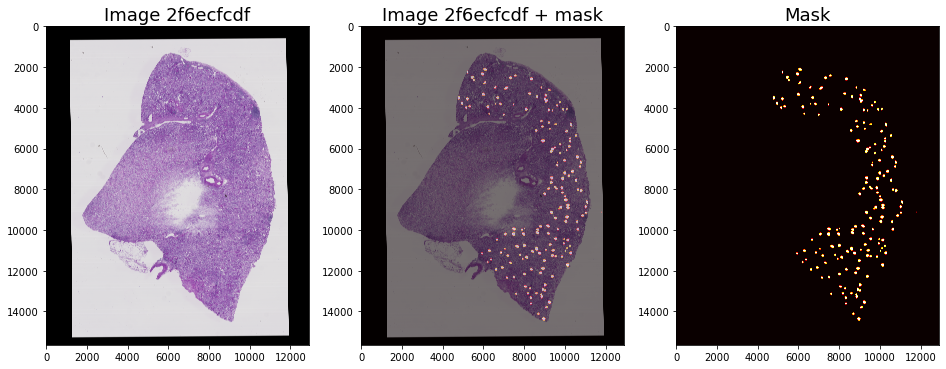

In [ ]:
plot_image_and_mask(image, mask, image_id)

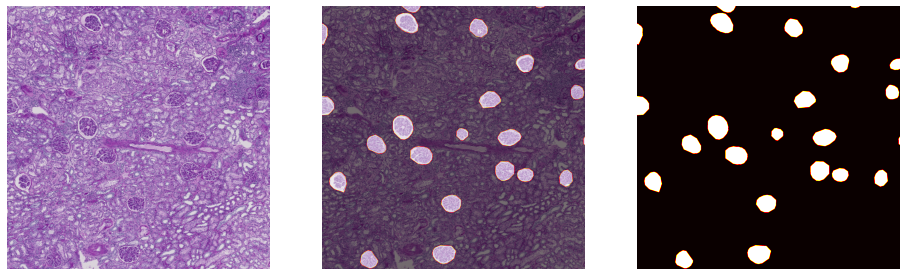

In [ ]:
plot_slice_image_and_mask(image, mask, 10000, 12000, 8000, 10000)

## aaa6a05cc

In [ ]:
image_id = "aaa6a05cc"
image, mask = read_image(image_id)

[aaa6a05cc] Image shape: (18484, 13013, 3)
[aaa6a05cc] Mask shape: (18484, 13013)


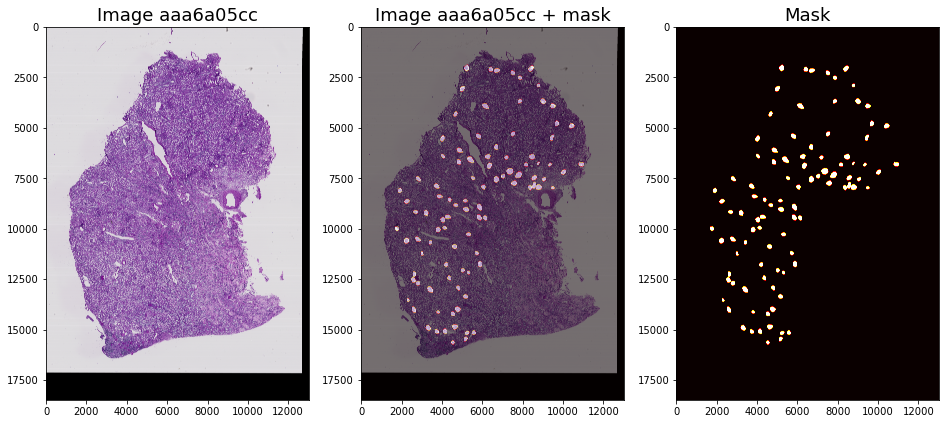

In [ ]:
plot_image_and_mask(image, mask, image_id)

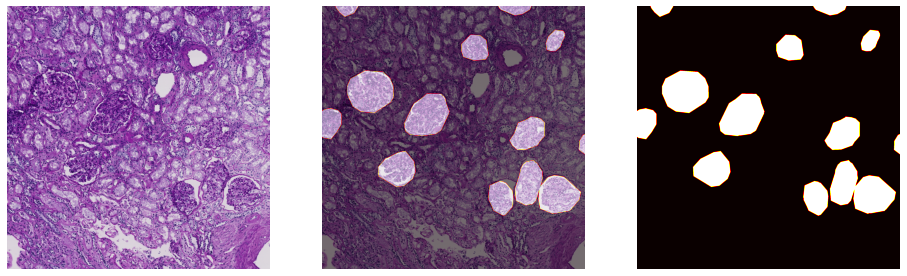

In [ ]:
plot_slice_image_and_mask(image, mask, 6500, 8500, 7000, 9000)

## e79de561c

In [ ]:
image_id = "e79de561c"
image, mask = read_image(image_id)

[e79de561c] Image shape: (16180, 27020, 3)
[e79de561c] Mask shape: (16180, 27020)


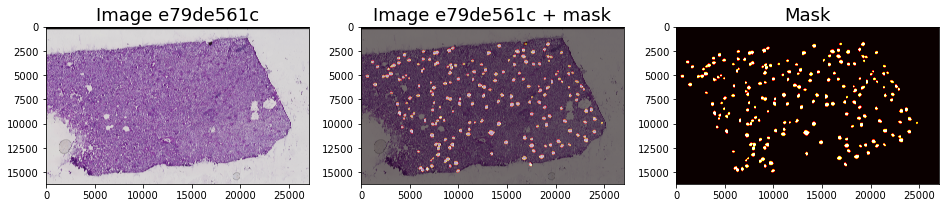

In [ ]:
plot_image_and_mask(image, mask, image_id)

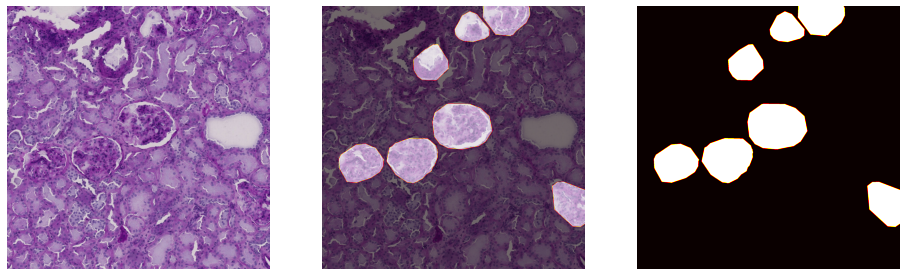

In [ ]:
plot_slice_image_and_mask(image, mask, 4000, 6000, 2000, 4000)

<a id="3"></a>
<h2 style='background:#EAA6D1; border:0; color:white'><center>Metadata Analysis<center><h2>

In [ ]:
pd.read_json(
    os.path.join(BASE_PATH, "train/0486052bb-anatomical-structure.json")
)

type                    id  \
0  Feature  PathAnnotationObject   
1  Feature  PathAnnotationObject   

                                            geometry  \
0  {'type': 'Polygon', 'coordinates': [[[20606, 4...   
1  {'type': 'Polygon', 'coordinates': [[[30717, 1...   

                                          properties  
0  {'classification': {'name': 'Medulla', 'colorR...  
1  {'classification': {'name': 'Cortex', 'colorRG...

In [ ]:
pd.read_json(
    os.path.join(BASE_PATH, "train/0486052bb.json")
)

type                    id  \
0    Feature  PathAnnotationObject   
1    Feature  PathAnnotationObject   
2    Feature  PathAnnotationObject   
3    Feature  PathAnnotationObject   
4    Feature  PathAnnotationObject   
..       ...                   ...   
121  Feature  PathAnnotationObject   
122  Feature  PathAnnotationObject   
123  Feature  PathAnnotationObject   
124  Feature  PathAnnotationObject   
125  Feature  PathAnnotationObject   

                                              geometry  \
0    {'type': 'Polygon', 'coordinates': [[[4747, 96...   
1    {'type': 'Polygon', 'coordinates': [[[6631, 67...   
2    {'type': 'Polygon', 'coordinates': [[[6287, 10...   
3    {'type': 'Polygon', 'coordinates': [[[6579, 13...   
4    {'type': 'Polygon', 'coordinates': [[[8779, 11...   
..                                                 ...   
121  {'type': 'Polygon', 'coordinates': [[[23073, 2...   
122  {'type': 'Polygon', 'coordinates': [[[20891, 5...   
123  {'type': 'Polygon', 'coordinates': [[[15277, 2...   
124  {'type': 'Polygon', 'coordinates': [[[7172, 85...   
125  {'type': 'Polygon', 'coordinates': [[[4139, 95...   

                                            properties  
0    {'classification': {'name': 'glomerulus', 'col...  
1    {'classification': {'name': 'glomerulus', 'col...  
2    {'classification': {'name': 'glomerulus', 'col...  
3    {'classification': {'name': 'glomerulus', 'col...  
4    {'classification': {'name': 'glomerulus', 'col...  
..                                                 ...  
121  {'classification': {'name': 'glomerulus', 'col...  
122  {'classification': {'name': 'glomerulus', 'col...  
123  {'classification': {'name': 'glomerulus', 'col...  
124  {'classification': {'name': 'glomerulus', 'col...  
125  {'classification': {'name': 'glomerulus', 'col...  

[126 rows x 4 columns]

In [ ]:
df_info["split"] = "test"
df_info.loc[df_info["image_file"].isin(os.listdir(os.path.join(BASE_PATH, "train"))), "split"] = "train"

In [ ]:
df_info["area"] = df_info["width_pixels"] * df_info["height_pixels"]

In [ ]:
df_info.head()

image_file  width_pixels  height_pixels  \
0  afa5e8098.tiff         43780          36800   
1  54f2eec69.tiff         22240          30440   
2  1e2425f28.tiff         32220          26780   
3  e79de561c.tiff         27020          16180   
4  c68fe75ea.tiff         19780          26840   

  anatomical_structures_segmention_file glomerulus_segmentation_file  \
0   afa5e8098-anatomical-structure.json               afa5e8098.json   
1   54f2eec69-anatomical-structure.json               54f2eec69.json   
2   1e2425f28-anatomical-structure.json               1e2425f28.json   
3   e79de561c-anatomical-structure.json               e79de561c.json   
4   c68fe75ea-anatomical-structure.json               c68fe75ea.json   

   patient_number                       race               ethnicity     sex  \
0           67347                      White  Not Hispanic or Latino  Female   
1           67548  Black or African American  Not Hispanic or Latino    Male   
2           63921                      White  Not Hispanic or Latino    Male   
3           67026  Black or African American  Not Hispanic or Latino    Male   
4           67112                      White  Not Hispanic or Latino    Male   

   age  weight_kilograms  height_centimeters  bmi_kg/m^2 laterality  \
0   58              59.0               160.0        23.0      Right   
1   58              79.9               190.5        22.0      Right   
2   48             131.5               193.0        35.3      Right   
3   53              73.0               166.0        26.5       Left   
4   56              91.2               167.6        32.5       Left   

   percent_cortex  percent_medulla  split        area  
0              55               45   test  1611104000  
1              75               25  train   676985600  
2              65               35  train   862851600  
3              55               45  train   437183600  
4              80               20   test   530895200

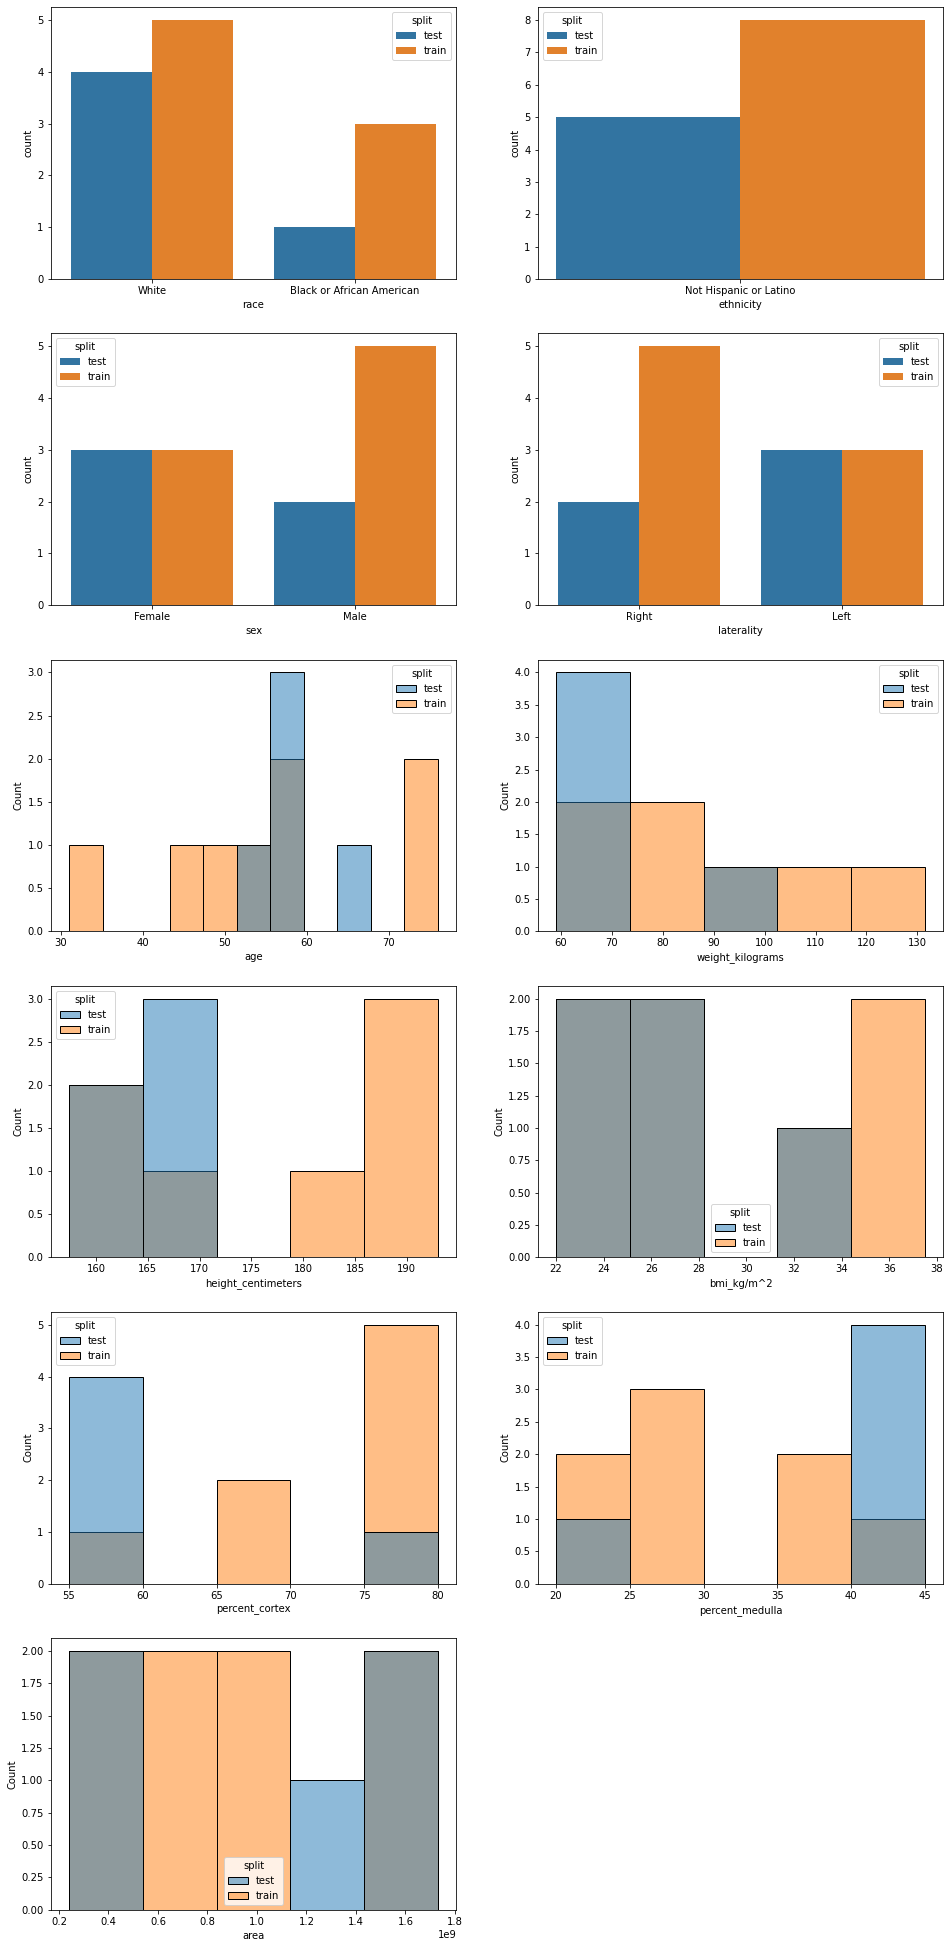

In [ ]:
plt.figure(figsize=(16, 35))
plt.subplot(6, 2, 1)
sn.countplot(x="race", hue="split", data=df_info)
plt.subplot(6, 2, 2)
sn.countplot(x="ethnicity", hue="split", data=df_info)
plt.subplot(6, 2, 3)
sn.countplot(x="sex", hue="split", data=df_info)
plt.subplot(6, 2, 4)
sn.countplot(x="laterality", hue="split", data=df_info)
plt.subplot(6, 2, 5)
sn.histplot(x="age", hue="split", data=df_info)
plt.subplot(6, 2, 6)
sn.histplot(x="weight_kilograms", hue="split", data=df_info)
plt.subplot(6, 2, 7)
sn.histplot(x="height_centimeters", hue="split", data=df_info)
plt.subplot(6, 2, 8)
sn.histplot(x="bmi_kg/m^2", hue="split", data=df_info)
plt.subplot(6, 2, 9)
sn.histplot(x="percent_cortex", hue="split", data=df_info)
plt.subplot(6, 2, 10)
sn.histplot(x="percent_medulla", hue="split", data=df_info)
plt.subplot(6, 2, 11)
sn.histplot(x="area", hue="split", data=df_info);

# WORK IN PROGRESS...